In [1]:
import pywt
import torch
import matplotlib.pyplot as plt
import numpy as np

# current work
I am adding a 400 by 400 noise matrix to the spectrogram of the gravitational wave

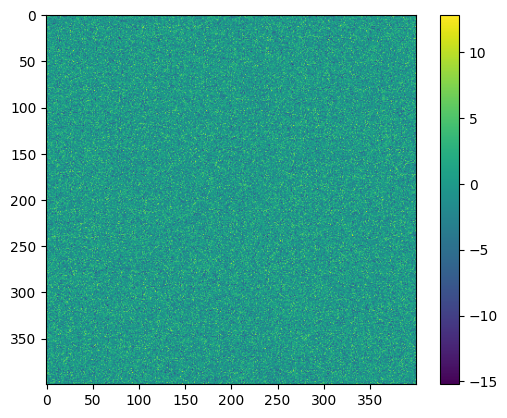

In [2]:
randimg = np.random.normal(0,3,(400,400))
plt.imshow(randimg)
plt.colorbar()
plt.show()

# Morlet transform code
code from sanika for the morlet transform
the commented out line ```# Z = Z[::5, ::45][:, :400]``` trims the data to the right size while maintaining data resolution

In [3]:
scale_min = 1
scale_max = 201
dscale = 0.1

def wt(postmerger, sam_p):
    sam_f = 1/sam_p
    scales = np.arange(scale_min, scale_max, dscale)

    # CWT on the gwf using the Morlet wavelet
    coefs, freqs = pywt.cwt(postmerger, scales, 'morl', sampling_period=sam_p)

    # Normalising the coefficient matrix using the Frobenius norm
    Z = (np.abs(coefs))/(np.linalg.norm(coefs))
    # Z = Z[::5, ::45][:, :400]
    return Z

# Analyzing the noise
Taking a look and understanding post morlet-transform gaussian noise

In [6]:
#generating a random time series of length 1000000
randts = torch.normal(0,1,(1000000,))
randts = randts.numpy()

In [7]:
randtspwt = wt(randts,1)


(2000, 1000000)


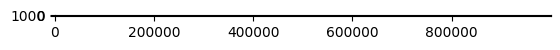

In [8]:
print(randtspwt.shape)
# plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(randtspwt) 

In [ ]:
plt.rcParams["figure.figsize"]

[6.4, 4.8]

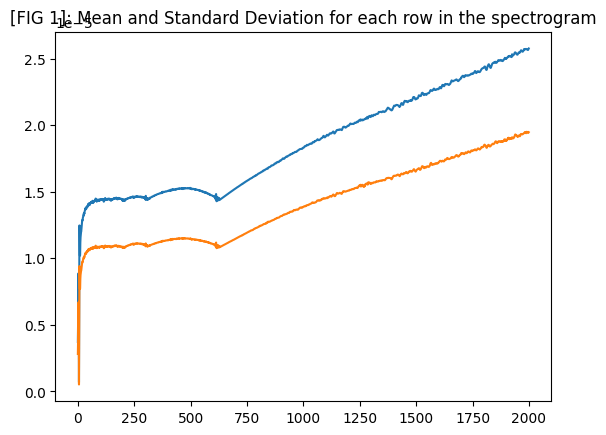

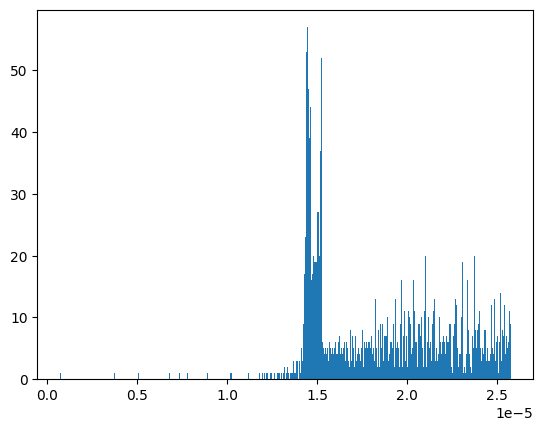

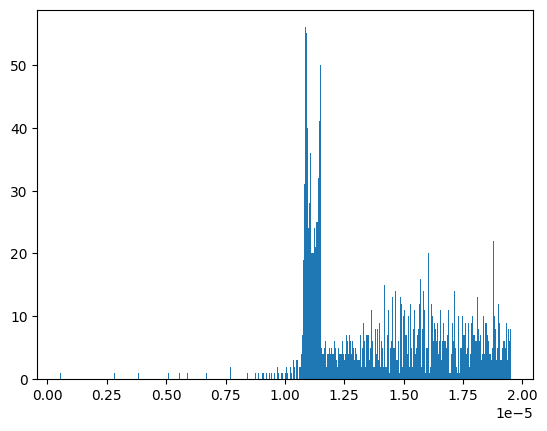

In [9]:
# This shows the mean value and standard deviation for each row in the spectrogram
means = []
stds = []
for a in randtspwt:
    # print(a == randtspwt[0])
    means.append(np.mean(a))
    stds.append(np.std(a))
plt.title("[FIG 1]: Mean and Standard Deviation for each row in the spectrogram")
plt.plot(means)
plt.plot(stds)
plt.show()
plt.hist(means, bins = 500)
plt.show()
plt.hist(stds,bins=500)
plt.show()

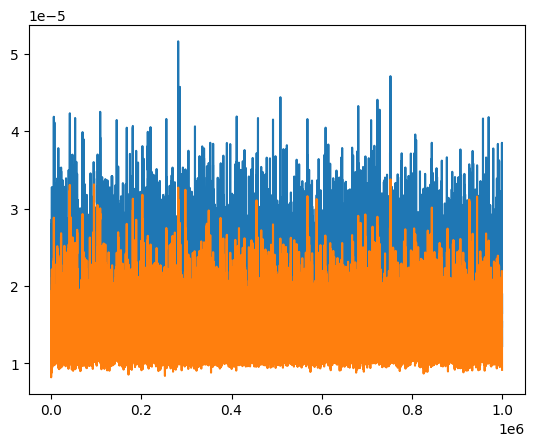

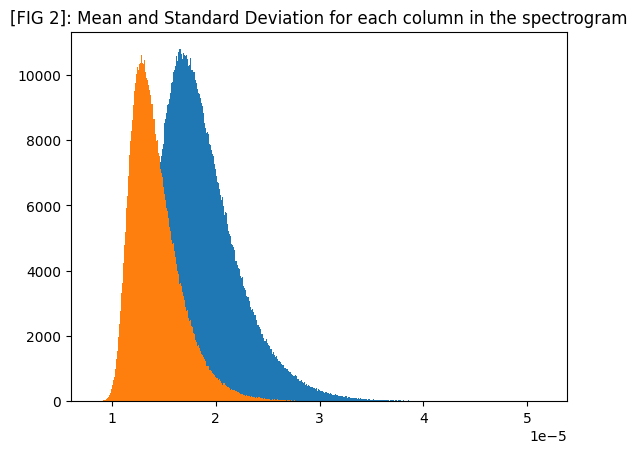

In [10]:
# this shows the mean value and standard deviation for each column in the spectrogram
means = []
stds = []
for a in randtspwt.T:
    means.append(np.mean(a))
    stds.append(np.std(a))
plt.plot(means)
plt.plot(stds)
plt.show()
plt.title("[FIG 2]: Mean and Standard Deviation for each column in the spectrogram")
plt.hist(means, bins = 500)
plt.hist(stds,bins=500)
plt.show()


# Proposed plan

1. Generate a 400 by 400 gaussian noise matrix or a matrix consisting of only the value 1
2. Generate an image  mask by using the values from FIG 1
3. Generate an image mask by using the values from FIG 2
4. Multiply the masks by the initial matrix elementwise to get a final fake noise.

Some resources I found were
 - [Math Stack Exchange - Fourier transform of gaussian noise](https://math.stackexchange.com/questions/3101208/fourier-transform-of-gaussian-noise)
 - [Rice Distribution](https://en.wikipedia.org/wiki/Rice_distribution)
 - [FAR too much math for me](https://dsp.stackexchange.com/questions/24170/what-are-the-statistics-of-the-discrete-fourier-transform-of-white-gaussian-nois)